# Veränderung der weltweiten Suizidrate
Python Leistungsnachweis (BMLD Informatik 1)

## Gruppe
- Meret Brandt (brandmer@students.zhaw.ch)
- Steffi Neuhof (bierist3@students.zhaw.ch)
- Leah Talary (talarlea@students.zhaw.ch)
- Lena Seger (segerlen@students.zhaw.ch)

## Fragen
- In welchen Ländern hat die Suizidrate am meisten zugenommen?
- Wo hat die Suizidrate abgenommen?
- Weshalb könnte das so sein?

## Quellen
- https://ourworldindata.org/grapher/death-rate-from-suicides-gho?country=FIN~AUT~NOR~FRA~LUX~ESP~ITA


# 1. Daten beschaffen und laden

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset

df = pd.read_csv('suicide_rate.csv', skiprows=1, 
                 names=['Entity','Code','Year','Age-standardized death rate from self-harm among both sexes'])
df.head()

,Entity,Code,Year,Age-standardized death rate from self-harm among both sexes
0,Afghanistan,AFG,2000,7.197108
1,Afghanistan,AFG,2001,7.281792
2,Afghanistan,AFG,2002,7.123594
3,Afghanistan,AFG,2003,7.053904
4,Afghanistan,AFG,2004,7.034545


# 2. Daten vorbereiten

In [4]:
# Rename columns for easier access
df.columns = ["Entity", "Code", "Year", "Death Rate"]

In [5]:
# Convert Year to integer and Rate to numeric
df["Year"] = df["Year"].astype(int)
df["Death Rate"] = pd.to_numeric(df["Death Rate"], errors="coerce")

In [6]:
df_pivot = df.pivot(index='Entity', columns='Year', values='Death Rate')
df_pivot.head()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.197108,7.281792,7.123594,7.053904,7.034545,6.910225,6.608689,6.476178,6.302887,5.891947,...,5.774172,5.685669,5.535404,5.319865,5.322144,5.470633,5.424701,5.367804,5.324849,5.320608
Africa,10.093091,10.013195,10.017222,10.010037,9.915320,9.732854,9.715343,9.649155,9.645603,9.606206,...,9.522184,9.436768,9.414608,9.401263,9.310595,9.228361,9.374145,9.355742,9.379318,9.580948
Albania,5.104753,4.418037,4.479788,4.595087,4.502845,6.913495,6.862893,6.947456,6.954976,6.820407,...,4.092385,4.056547,3.798754,3.580979,3.450706,3.292069,3.141507,3.026028,2.507422,2.143994
Algeria,4.140792,3.921089,3.803862,3.521953,3.327965,3.218484,3.081167,2.945067,2.815762,2.683964,...,2.364761,2.327027,2.295923,2.225488,2.135747,2.136896,2.172493,2.170682,1.848795,2.320863
Andorra,9.685721,10.776894,10.718483,9.985846,11.859435,10.398196,10.702955,10.374284,10.033582,9.822695,...,8.119903,9.338711,9.277414,9.163852,9.708513,8.330241,7.659383,8.645201,12.004117,5.742578


# 3. Statistik der Roh-Daten (Analyse im Long-Format)

### über die einzelnen Spalten kann folgendes ausgesagt werden:

- Die Spalte *Entity* enthält 201 verschiedene Länder.
- Es sind Daten zwischen 2000 und 2021 vorhanden.
- Die Suizidrate streut zwischen 0.0 und 47.8 Todesfällen pro 100'000 Einwohner.

In [7]:
print("Anzahl Länder (Entity):", df['Entity'].nunique())
print("Jahresbereich:", df['Year'].min(), "-", df['Year'].max())
print("Death Rate min/max:", df['Death Rate'].min(), "-", df['Death Rate'].max())

Anzahl Länder (Entity): 201
Jahresbereich: 2000 - 2021
Death Rate min/max: 0.0 - 47.826057


# 3.1 Analyse Gebiete

In [8]:
print('Anzahl verschiedener Gebiete: ', len(df['Entity'].unique()))

Anzahl verschiedener Gebiete:  201


In [9]:
# Anzahl Datenpunkte pro Gebiet
df['Entity'].value_counts()

Entity
Afghanistan    22
Africa         22
Albania        22
Algeria        22
Andorra        22
               ..
Vietnam        22
World          22
Yemen          22
Zambia         22
Zimbabwe       22
Name: count, Length: 201, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

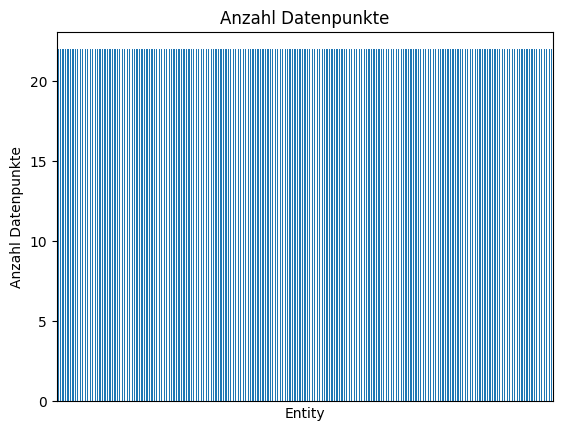

In [10]:
df['Entity'].value_counts().plot(kind='bar',
                                 xticks=[], # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte')

# 3.2 Analyse Jahr

In [11]:
print('Anzahl verschiedener Jahre: ', len(df['Year'].unique()))

Anzahl verschiedener Jahre:  22


In [12]:
# Anzahl Datenpunkte pro Jahr
df['Year'].value_counts().sort_index()

Year
2000    201
2001    201
2002    201
2003    201
2004    201
2005    201
2006    201
2007    201
2008    201
2009    201
2010    201
2011    201
2012    201
2013    201
2014    201
2015    201
2016    201
2017    201
2018    201
2019    201
2020    201
2021    201
Name: count, dtype: int64

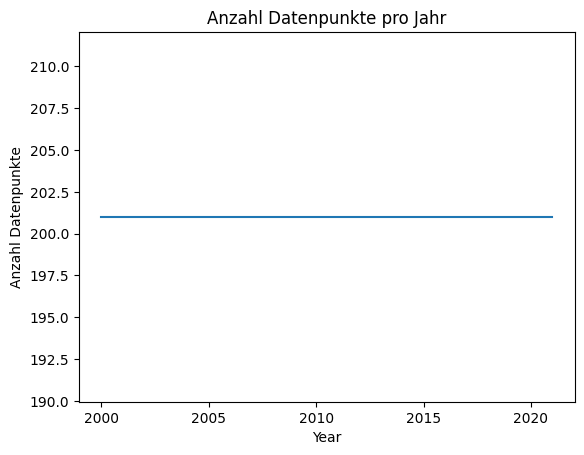

In [13]:
g = df['Year'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');

# 3.3 Analyse Suizidrate

In [14]:
df.describe()

,Year,Death Rate
count,4422.000000,4422.000000
mean,2010.500000,10.522733
std,6.345006,6.998967
min,2000.000000,0.000000
25%,2005.000000,5.339155
50%,2010.500000,9.574253
75%,2016.000000,13.685492
max,2021.000000,47.826057


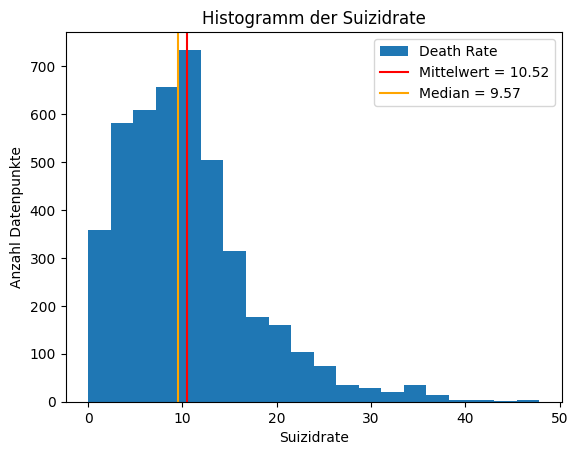

In [15]:
g = df['Death Rate'].plot(kind='hist', bins=20, title='Histogramm der Suizidrate', 
                           xlabel='Suizidrate', ylabel='Anzahl Datenpunkte')
mean = df['Death Rate'].mean()
g.axvline(x=df['Death Rate'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Death Rate'].median()
g.axvline(x=df['Death Rate'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()


# 3.4 Global Trend (World)

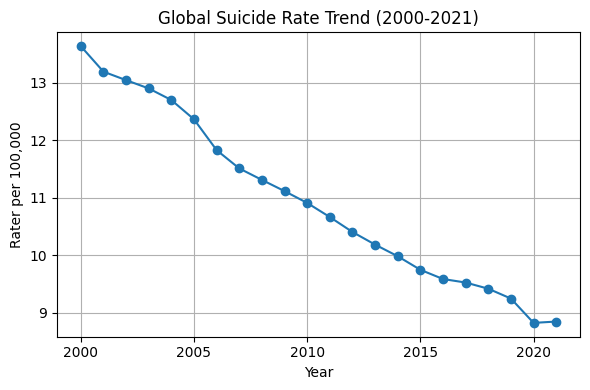

In [16]:
world_data = df[df["Entity"]=="World"]
plt.figure(figsize=(6, 4))
plt.plot(world_data["Year"], world_data["Death Rate"], marker="o")
plt.title("Global Suicide Rate Trend (2000-2021)")
plt.xlabel("Year")
plt.ylabel("Rater per 100,000")
plt.grid(True)
plt.tight_layout()


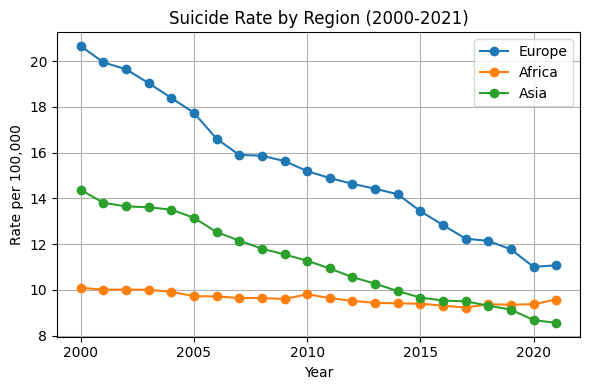

In [17]:
# Vergleich von Regionen (Europa, Afrika, Asien)
regions = ["Europe", "Africa", "Asia"]
region_data = df[df["Entity"].isin(regions)]
plt.figure(figsize=(6, 4))
for region in regions:
    subset = region_data[region_data["Entity"] == region]
    plt.plot(subset["Year"], subset["Death Rate"], marker="o", label=region)
plt.title("Suicide Rate by Region (2000-2021)")
plt.xlabel("Year")
plt.ylabel("Rate per 100,000")
plt.legend()
plt.grid(True)
plt.tight_layout()

In [18]:
# Top-10 Länder basierend auf 2021 ermitteln
data_2021 = df[(df["Year"] == 2021) & (~df["Entity"].isin(["World", "Africa", "Europe", "Asia", "Oceania", "North America", "South America"]))]
top10_countries = data_2021.sort_values(by="Death Rate", ascending=False).head(10)["Entity"].tolist()

# Wähle die ersten 10 Länder aus
top10_countries = top10_countries[:10]

# Filtere die Daten für diese Länder
top10_data = df[df["Entity"].isin(top10_countries)]

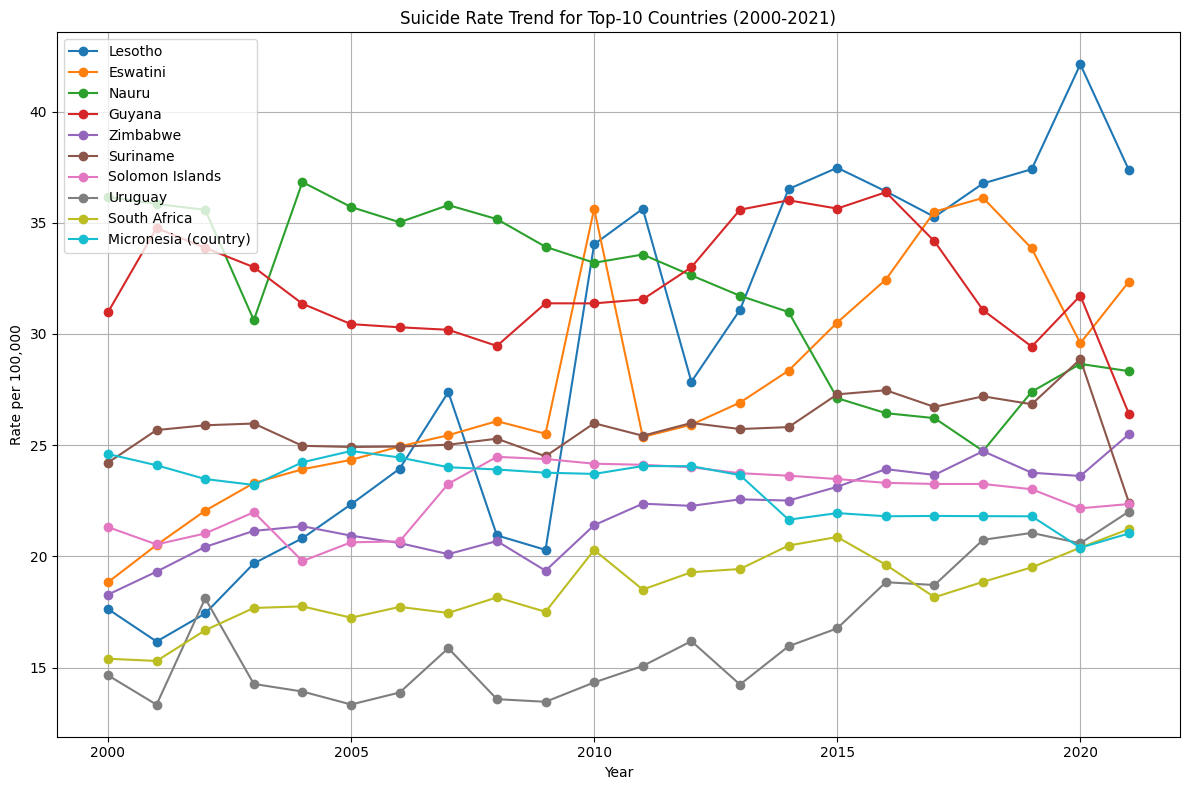

In [19]:
# Liniendiagramm erstellen
plt.figure(figsize=(12, 8))
for country in top10_countries:
    subset = top10_data[top10_data["Entity"] == country]
    plt.plot(subset["Year"], subset["Death Rate"], marker="o", label=country)

plt.title("Suicide Rate Trend for Top-10 Countries (2000-2021)")
plt.xlabel("Year")
plt.ylabel("Rate per 100,000")
plt.legend()
plt.grid(True)
plt.tight_layout()

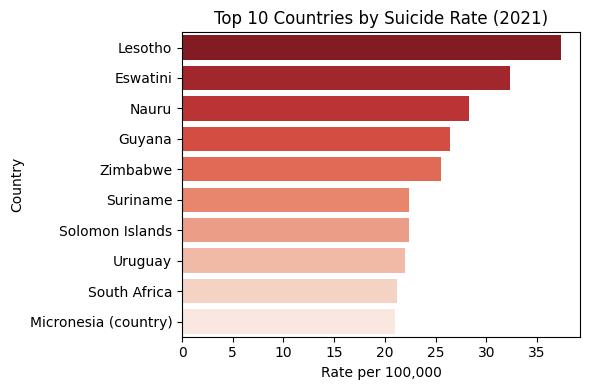

In [20]:
# Top 10 Länder mit höchster Rate im Jahr 2021
data_2021 = df[(df["Year"] == 2021) & (~df["Entity"].isin(["World", "Africa", "Europe", "Asia", "Oceania", "North America", "South America"]))]
top10 = data_2021.sort_values(by="Death Rate", ascending=False).head(10)
plt.figure(figsize=(6, 4))
sns.barplot(x="Death Rate", y="Entity", data=top10, hue="Entity", palette="Reds_r")
plt.title("Top 10 Countries by Suicide Rate (2021)")
plt.xlabel("Rate per 100,000")
plt.ylabel("Country")
plt.tight_layout()

# 3.5 Differenzen
## Grösste und kleinste Differenzen der Suizidrate 2000-2021

In [21]:
diffs = df_pivot[2021]-df_pivot[2000]   # Differenz zwischen 2021 und 2000
diffs = diffs.sort_values().dropna()  # sortieren nach Differenz und NaN-Werte entfernen
diffs

Entity
Russia       -29.930334
Lithuania    -29.010038
Sri Lanka    -26.072413
Belarus      -23.671048
Kazakhstan   -19.376679
                ...    
Mozambique     7.008658
Zimbabwe       7.212313
Uruguay        7.361354
Eswatini      13.517197
Lesotho       19.728698
Length: 201, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen der Suizidrate 2000-2021'}, ylabel='Entity'>

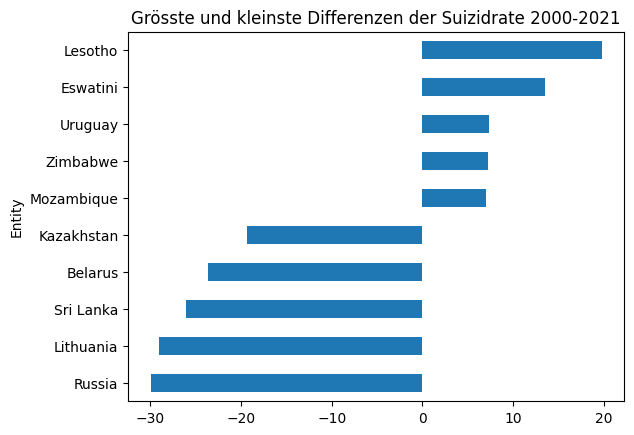

In [26]:
diff_sel = (diffs < -19) | (diffs > 7)  # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen der Suizidrate 2000-2021')

In [27]:
Gebiets_liste = diffs[diff_sel].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Gebiets_liste)

['Russia', 'Lithuania', 'Sri Lanka', 'Belarus', 'Kazakhstan', 'Mozambique', 'Zimbabwe', 'Uruguay', 'Eswatini', 'Lesotho']


Text(2020.5, 37, 'Covid')

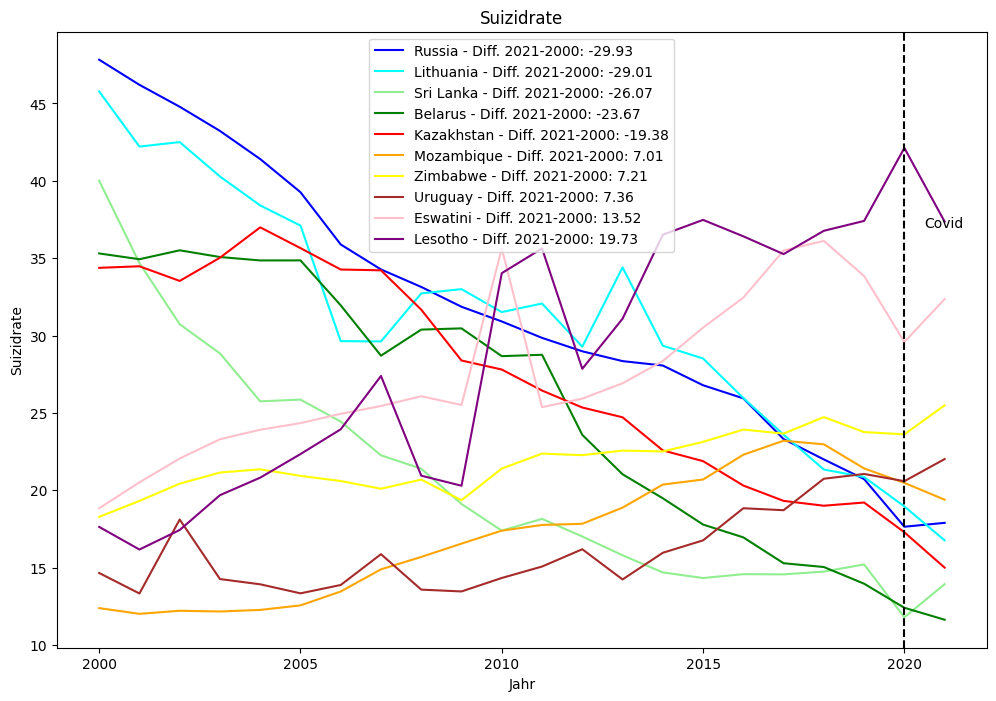

In [30]:
color_dict = {
    'Russia': 'blue',
    'Lithuania': 'cyan',
    'Sri Lanka': 'lightgreen',
    'Belarus': 'green',
    'Kazakhstan': 'red',
    'Mozambique': 'orange',
    'Zimbabwe': 'yellow',
    'Uruguay': 'brown',
    'Eswatini': 'pink',
    'Lesotho': 'purple'
}

for gebiet in Gebiets_liste:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title='Suizidrate', xlabel='Jahr', ylabel=f'Suizidrate', legend=True,
                                  label=f'{gebiet} - Diff. 2021-2000: {diff:.2f}', # für die Legende
                                  color=color_dict[gebiet],        # Farbe aus color_dict
                                  figsize=(12,8))                   # Grösse des Plots

# Covid Pandemie    
g.axvline(x=2020, color='black', linestyle='--') 
g.text(2020.5, 37, 'Covid')  


# 4. Analyse

## Vorgehen
Zuerst wurde die Suizidrate für alle im Datensatz enthaltenen Länder betrachtet. Anschliessend wurde die Veränderung zwischen den Jahren 2000 und 2021 berechnet, um Länder mit besonders starken Zu- oder Abnahmen zu identifizieren. Für diese Länder wurden Zeitreihen geplottet, um die Entwicklungen visuell zu untersuchen.

## Beobachtungen
- Die meisten Länder im Datensatz zeigen seit dem Jahr 2000 eine abnehmende Suizidrate.
- Einige Länder weisen jedoch weiterhin erhöhte Werte auf, während andere nur geringe Veränderungen zeigen.
- Internationale Vergleiche zeigen grosse Unterschiede zwischen Ländern mit sehr niedrigen und sehr hohen Suizidraten.
- Besonders auffällig ist, dass einige Länder, wie z. B. Lesotho, im globalen Vergleich extrem hohe Suizidraten aufweisen.
- Die COVID-19-Pandemie führte in einigen Ländern zu kurzfristigen Veränderungen, diese fallen im Vergleich zu langfristigen Trends jedoch weniger stark ins Gewicht.
- Wir haben festgestellt, dass die Länder mit den durchschnittlich grössten Suizidraten zwischen 2000 - 2021 alles Entwicklungs- und Schwellenländer sind. 
- Schwankungen können auch aus veränderten Erfassungsmethoden entstehen, da Suizid in manchen Ländern unterdokumentiert ist. Das könnte z.B. für Russland der Fall sein was jedoch nur eine Annahme von uns ist, da dies nicht durch eine Quelle bestätigt wird. 

## Interpretation
Internationale Studien zeigen, dass die Suizidraten weltweit seit Beginn der 2000er-Jahre deutlich gesunken sind. Die globale altersstandardisierte Suizidrate ging von etwa 14 pro 100'000 im Jahr 2000 auf rund 9 pro 100'000 im Jahr 2019 zurück (Ilic & Ilic, 2022). Dieser langfristige Rückgang wird häufig mit Verbesserungen im Gesundheitswesen, verstärkter Prävention und gesellschaftlichen Veränderungen in Verbindung gebracht.

Einige Länder verzeichnen weiterhin besonders hohe Suizidraten. Ein Beispiel ist Lesotho, das in internationalen Berichten als eines der Länder mit den höchsten Suizidraten weltweit genannt wird. Ursachen dafür werden unter anderem in sozialer Instabilität, wirtschaftlichen Belastungen und unzureichender psychischer Gesundheitsversorgung gesehen (CGTN Africa, 2023).

Während der COVID-19-Pandemie wurde international befürchtet, dass die Suizidraten deutlich ansteigen könnten. Eine grosse systematische Übersicht zeigt jedoch, dass in vielen Ländern keine signifikante Erhöhung der Suizide während der Pandemie festgestellt wurde, obwohl psychische Belastungen zugenommen haben (Yan et al., 2023). 

Wir erklären uns den Rückgang der Suizidrate in Russland durch folgende Punkte: Die wirtschaftliche Lage hat sich seit den 1990er Jahren stabilisiert, es gibt mehr Präventionsangebote und strengere Alkoholgesetze. Gleichzeitig könnten statistische Verzerrungen durch Untererfassung oder Umklassifizierung von Todesursachen die Zahlen beschönigen. 

Unsere Daten bestätigen diese globalen Beobachtungen: Auch im Zeitraum 2000–2021 zeigen die meisten Länder einen rückläufigen Trend, teilweise mit deutlichen Verbesserungen. Einzelne Länder weisen jedoch weiterhin erhöhte Werte auf, was auf unterschiedliche soziale, wirtschaftliche oder gesundheitspolitische Rahmenbedingungen hinweisen kann.


# 5. Referenzen
- Yan, Y., Hou, J., Li, Q., & Yu, N. X. (2023). Suicide before and during the COVID-19 Pandemic: A Systematic Review with Meta-Analysis. International journal of environmental research and public health, 20(4), 3346. https://doi.org/10.3390/ijerph20043346

- Ilic, M., & Ilic, I. (2022). Worldwide suicide mortality trends (2000-2019): A joinpoint regression analysis. World journal of psychiatry, 12(8), 1044–1060. https://doi.org/10.5498/wjp.v12.i8.1044

- https://africa.cgtn.com/lesotho-grapples-with-escalating-mental-health-challenges/